# Gradient of Image

## import library

In [64]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [65]:
I0 = img.imread('test.jpeg')

## check the size of the input image

In [66]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.shape[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [67]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = np.asarray(np.dot(I0[...,:3],[0.2989, 0.5870, 0.1140]))
        
num_row     = I.shape[0]
num_column  = I.shape[1]

print(I.shape)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)


(510, 512)
number of rows of I =  510
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [68]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

def normalize(d):
    return (d - np.min(d)) / (np.max(d) - np.min(d))

I = normalize(I)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [94]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    D = np.roll(I, [-1, 0])
    D[:,-1:] = D[:,-2:-1] #바운더리 컨디션 처리 
    D = D - I
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

[[-3.71824539e-02  2.45122112e-02 -8.49785964e-03 ... -3.40687703e-02
  -6.12404881e-01  0.00000000e+00]
 [ 1.85674779e-03 -4.11075324e-02  1.30510135e-02 ... -1.94993847e-02
  -6.30899345e-01  0.00000000e+00]
 [ 4.71009415e-02 -4.61392011e-02  1.65042503e-02 ... -6.26752477e-02
  -6.12447276e-01  0.00000000e+00]
 ...
 [-1.25811346e-03  2.23528096e-02 -1.11782890e-01 ...  7.84175641e-02
  -7.82519485e-01  0.00000000e+00]
 [ 3.12491045e-02 -3.79263307e-02 -1.98428634e-02 ... -6.31808484e-02
  -7.19313514e-01  0.00000000e+00]
 [ 1.62514500e-04  2.63752397e-03 -3.11168161e-02 ... -6.40754633e-02
  -6.75859727e-01  0.00000000e+00]]


- backward difference : $ I[x, y] - I[x-1, y] $ 

In [95]:

def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    

    D = np.roll(I, [1, 0])
    D[:,:1] = D[:,1:2] #바운더리 컨디션 처리 
    D = I - D
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D


[[ 0.00000000e+00 -3.71824539e-02  2.45122112e-02 ... -4.60850296e-03
  -3.40687703e-02 -6.12404881e-01]
 [ 0.00000000e+00  1.85674779e-03 -4.11075324e-02 ... -1.96253923e-02
  -1.94993847e-02 -6.30899345e-01]
 [ 0.00000000e+00  4.71009415e-02 -4.61392011e-02 ...  6.44091283e-03
  -6.26752477e-02 -6.12447276e-01]
 ...
 [ 0.00000000e+00 -1.25811346e-03  2.23528096e-02 ... -7.36634262e-02
   7.84175641e-02 -7.82519485e-01]
 [ 0.00000000e+00  3.12491045e-02 -3.79263307e-02 ...  1.54400551e-02
  -6.31808484e-02 -7.19313514e-01]
 [ 0.00000000e+00  1.62514500e-04  2.63752397e-03 ...  2.18884263e-03
  -6.40754633e-02 -6.75859727e-01]]


- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [71]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    E = compute_derivative_x_forward(I)
    F = compute_derivative_x_backward(I)
    
    D = (E+F)/2
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [72]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    D = np.roll(I, [-1, 0], axis=(0,1))
    D[-1:,:] = D[-2:-1,:] #바운더리 컨디션 처리 
    D = D - I
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [73]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    D = np.roll(I, [1, 0], axis=(0,1))
    D[:1,:] = D[1:2,:] #바운더리 컨디션 처리 
    D = I - D
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [74]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    E = compute_derivative_y_forward(I)
    F = compute_derivative_y_backward(I)
    
    D = (E+F)/2   
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D



## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [75]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    xArr = compute_derivative_x_central(I)
    yArr = compute_derivative_y_central(I)
    
    norm_gradient = np.multiply(xArr,xArr)+np.multiply(yArr,yArr)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

___

___

## functions for presenting the results

___

___

In [76]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [77]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [78]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [79]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [80]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [81]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [82]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [83]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [84]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [85]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [86]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [87]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [88]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [89]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [90]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [91]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [92]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


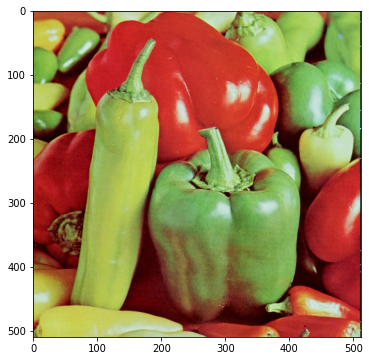

**************************************************
## [RESULT 02]
**************************************************


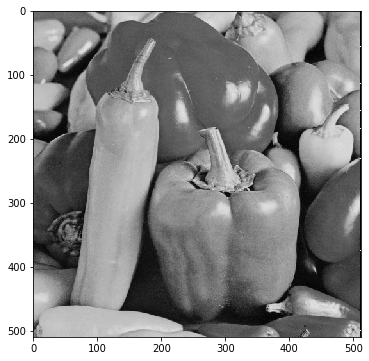

**************************************************
## [RESULT 03]
**************************************************


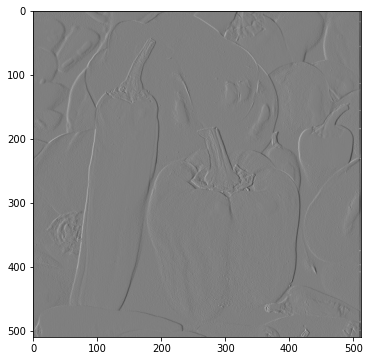

**************************************************
## [RESULT 04]
**************************************************


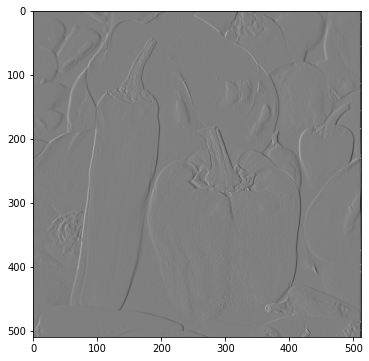

**************************************************
## [RESULT 05]
**************************************************


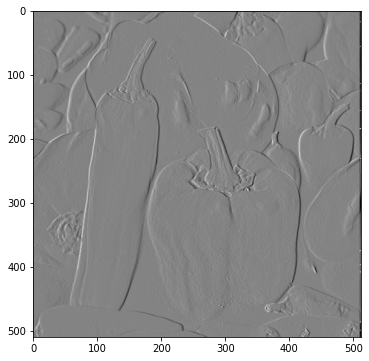

**************************************************
## [RESULT 06]
**************************************************


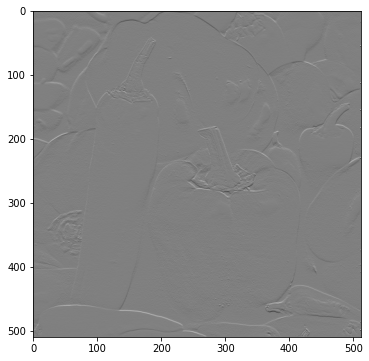

**************************************************
## [RESULT 07]
**************************************************


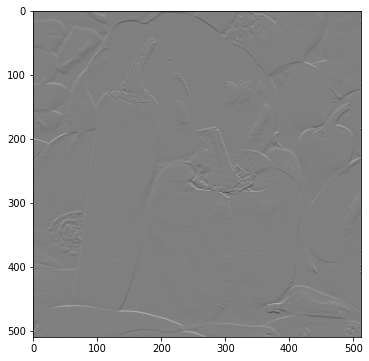

**************************************************
## [RESULT 08]
**************************************************


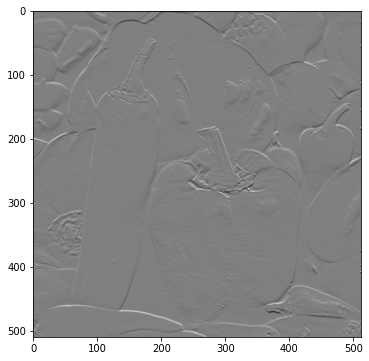

**************************************************
## [RESULT 09]
**************************************************


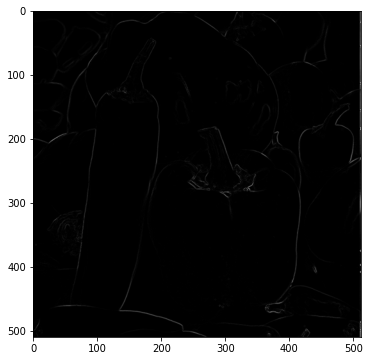

**************************************************
## [RESULT 10]
**************************************************


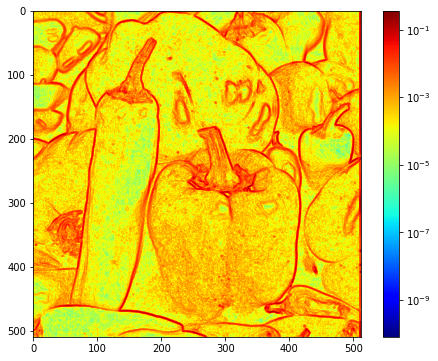

**************************************************
## [RESULT 11]
**************************************************
value1 =  -0.03718245392969094
value2 =  0.0
value3 =  -0.004281511227828494
value4 =  0.002177458767833873
**************************************************
## [RESULT 12]
**************************************************
value1 =  0.0
value2 =  -0.6758597272190197
value3 =  0.001275778077422074
value4 =  0.013741111261587502
**************************************************
## [RESULT 13]
**************************************************
value1 =  -0.01859122696484547
value2 =  -0.33792986360950983
value3 =  -0.00150286657520321
value4 =  0.007959285014710688
**************************************************
## [RESULT 14]
**************************************************
value1 =  -0.00970690470722857
value2 =  0.0
value3 =  0.004506048169454713
value4 =  0.013631983167580242
**************************************************
## [RESULT 15]
*********************

In [93]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)